# Exercise 3. Stability analysis

Tutorial: Pathway modeling using Ordinary Differential Equations

Instructor: [Veronica Llorens-Rico](veronica.llorensrico@kuleuven.vib.be)

Whole-cell Model Course; 9th April 2019

Centre for Genomic Regulation, Barcelona


## Assess the stability of the steady state described in the previous exercises

In the previous exercise, we had a system in steady state which we perturbed with the glucose pulse. What happens to the system when it's perturbed? Does it go back to the same steady state? In other words, is this steady state stable? We will assess this in the following exercise.

------

The model was firstly described in [Chassagnole et al, 2002](http://onlinelibrary.wiley.com/doi/10.1002/bit.10288/full). An implementation in Matlab of the model was obtained from [Villaverde et al, 2015](http://gingproc.iim.csic.es/biopredynbench/documentation.html) and recoded using Python.

------

First, we load the modules, data and custom functions that are required for this exercise

In [1]:
# LOAD MODULES
# ===================================================================================
import numpy as np
from scipy.integrate import odeint
import sys
sys.path.insert(0, 'src')  # necessary to work both in PyCharm and terminal
import numdifftools as ndt
import warnings
warnings.filterwarnings('ignore')

# LOAD DATA AND MODEL
# ===================================================================================
# Import differential equations model------------------------------------------------
# Import parameters
from equations_noperturbation import eqs_nopt
from equations import eqs
from plotSim import plotSimulation
from readData import *

# INLINE PLOTS
# =====================================================
import pylab
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15.0, 11.0)
matplotlib.rcParams['font.size'] = 14

### Exercise 3.1. Run the model with the estimated parameters, and the glucose perturbation, for a long time.

Run the model as in the previous exercise between t0=0 and t=1000. Does the model go back to the initial steady state point? Does it diverge? Does it oscillate?

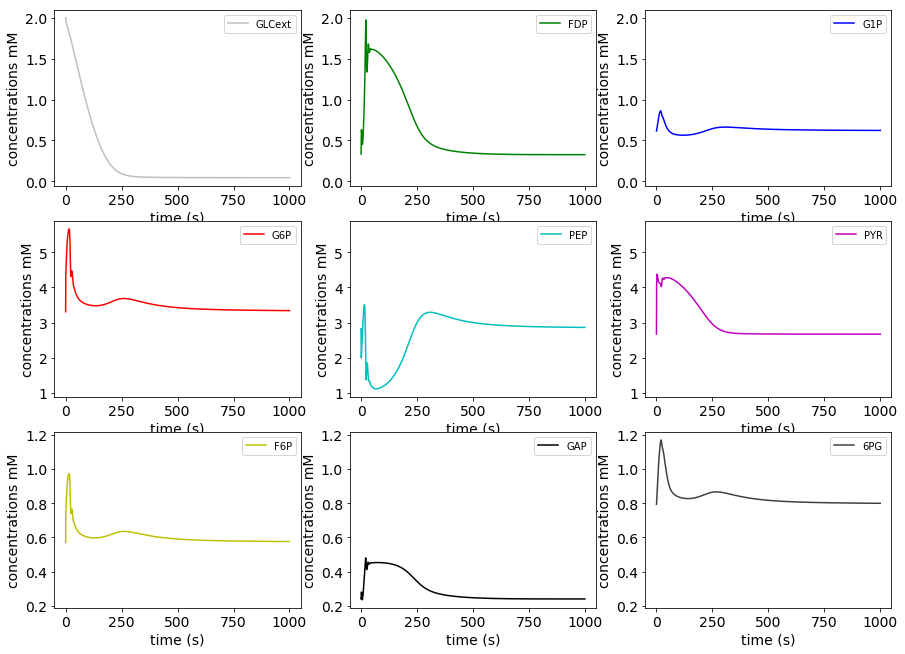

[ 0.18362497  0.10302558  0.42763126  2.2839832   0.00854037  0.39452366
  0.10896576  0.25068891  0.13766905  0.57577914  0.32691724  0.62310081
  3.34007588  0.23992721  0.04487413  2.86143136  0.79949788  2.66977198]


In [33]:
# First, we load the parameters and the initial conditions.
parameters = params('parameters.txt')
initial_cond = [0.185,  # cdhap
                0.103,  # ce4p
                0.422,  # cpg2
                2.254,  # cpg3
                0.008,  # cpgp
                0.393,  # crib5p
                0.108,  # cribu5p
                0.246,  # csed7p
                0.137,  # cxyl5p
                0.570,  # cf6p
                0.334,  # cfdp
                0.616,  # cg1p
                3.307,  # cg6p
                0.242,  # cgap
                2,      # cglex
                2.824,  # cpep
                0.793,  # cpg
                2.669]  # cpyr


# Then, we run the model, defining the time span, and plot the results
t = np.arange(0,1000,0.1)
ds = odeint(eqs, initial_cond, t, args = (parameters,))
plotSimulation(ds, t)

### Exercise 3.2. Calculate the Jacobian matrix of the model and solve it for the steady state point. Determine the eigenvalues of this matrix and describe the type of steady state. 

**Note:** since the simulation above has run for a long time, we assume that the end point of this simulation corresponds to the steady state.
**Hint:** to index the last element of an array, use the index "-1"

In [34]:
# Define the steady state concentrations of all metabolites as the end point concentrations of the simulation above.
steadystate_cond = ds[-1]

As there is no perturbation, we use a modified version of the **`equations.py`** script that does not account for the time dependencies of the NADH, NADP, NADPH, ATP, ADP and AMP. This is the **`equations_noperturbation.py`**, from which the eqs function (**`eqs_nopt`**) has already been imported.

The function that computes the Jacobian for a system of Ordinary Differential Equations such as the one presented here is **`ndt.Jacobian`**. The only required argument is the equations function.

In [35]:
# Calculate the Jacobian for the modified equations
Jacob = ndt.Jacobian(eqs_nopt)

Now, once the Jacobian matrix has been calculated, we need to pass the steady state concentrations (same as initial conditions) to solve the Jacobian for the steady state point. They need first to be converted to a NumPy array.

In [36]:
# Pass steady state concentrations as a NumPy array
j_matrix_solved = Jacob(np.array(steadystate_cond))

With the function **`linalg.eig`** from `NumPy` we can get the eigenvalues of a square matrix. This function returns the eigenvalues and the eigenvectors. We are only interested in the first.

In [37]:
# Extract the eigenvalues of the Jacobian matrix
eigenvalues = np.linalg.eig(j_matrix_solved)[0]

Now print the eigenvalues. Can you determine the type of steady state? Does any of the eigenvalues have an imaginary part? 

Does this coincide with your observation from exercise 3.1?

In [38]:
print eigenvalues

[ -3.21382112e+03+0.j          -3.26101328e+02+0.j          -2.35926460e+02+0.j
  -4.61691865e+01+0.j          -2.86131030e+01+0.j          -2.43995077e+01+0.j
  -1.81601245e+01+0.j          -1.24841805e+01+0.j          -4.98275823e+00+0.j
  -4.36451427e+00+0.j          -1.10075761e+00+0.j          -5.03399032e-01+0.j
  -2.31422653e-01+0.07292312j  -2.31422653e-01-0.07292312j
  -1.61227515e-01+0.j          -8.63398202e-03+0.j          -9.29837357e-02+0.j
  -4.15394486e-02+0.j        ]


### Exercise 3.3. In the model, we have small dilution effects. How they affect the steady state?

In the model, we have small dillution effects (D=0.278e-4 s-1). Do they affect how the system responds after a perturbation? The dilution effects may affect concentrations of metabolites. In this case, the time constant is 1/D = 35971s, ~10 hours.

The reciprocal absolute values of the real part of the eigenvalues are the time constants of the decline (determining how long takes to the system to go back to the steady state). Calculate these values and compare them with the dilution rates.

------

Eigenvalues have a real and an imaginary part. First, we extract the real part using the function **`real`** from NumPy:

In [39]:
# Extract the real part of the eigenvalues
eig_real = np.real(eigenvalues)

The reciprocal of X is calculated as 1/X

In [40]:
# Now we find the reciprocals of the real part
reciprocals = abs(1/eig_real)

Compare these values with the dilution rate. Are they higher, lower or of the same order? Is dilution affecting how the system behaves? **Note: ** these values have units of s. 

In [41]:
print reciprocals

[  3.11156086e-04   3.06653152e-03   4.23860893e-03   2.16594676e-02
   3.49490232e-02   4.09844334e-02   5.50657018e-02   8.01013731e-02
   2.00692057e-01   2.29120571e-01   9.08465213e-01   1.98649568e+00
   4.32109816e+00   4.32109816e+00   6.20241525e+00   1.15821413e+02
   1.07545690e+01   2.40735020e+01]
